<a href="https://colab.research.google.com/github/vard-uhi/tasks/blob/main/Linear_Regression_StatWithPython.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practice notebook for regression analysis with NHANES

This notebook will give you the opportunity to perform some
regression analyses with the NHANES data that are similar to
the analyses done in the week 2 case study notebook.

You can enter your code into the cells that say "enter your code here",
and you can type responses to the questions into the cells that say "Type Markdown and Latex".

Note that most of the code that you will need to write below is very similar
to code that appears in the case study notebook.  You will need
to edit code from that notebook in small ways to adapt it to the
prompts below.

To get started, we will use the same module imports and
read the data in the same way as we did in the case study:

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import numpy as np

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#load the data
from google.colab import files
data_to_load = files.upload()

Saving nhanes_2015_2016.csv to nhanes_2015_2016.csv


In [3]:
import io
# .read_csv() assigns the information from the initial *.csv file to this variable
raw_data = pd.read_csv(io.BytesIO(data_to_load['nhanes_2015_2016.csv']))

In [5]:
#copying Dataframe
df = raw_data.copy()

In [7]:
#looking at 1st few rows
df.head()

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,DMDMARTL,DMDHHSIZ,WTINT2YR,SDMVPSU,SDMVSTRA,INDFMPIR,BPXSY1,BPXDI1,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,1.0,2,134671.37,1,125,4.39,128.0,70.0,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,3.0,1,24328.56,1,125,1.32,146.0,88.0,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,1.0,2,12400.01,1,131,1.51,138.0,46.0,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,6.0,1,102718.00,1,131,5.00,132.0,72.0,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,3.0,5,17627.67,2,126,1.23,100.0,70.0,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0


## **Question 1:**

Use linear regression to relate the expected body mass index (BMI) to a person's age.

Our dependent variable is going to be BMI and independent variable age. For this case we will use statsmodels to run a Linear Regression model.

In [8]:
#creating Dataframe with BMI and Age variables
Q1_df = df[["RIDAGEYR", "BMXBMI"]]

In [9]:
Q1_df.head()

,RIDAGEYR,BMXBMI
0,62,27.8
1,53,30.8
2,78,28.8
3,56,42.4
4,42,20.3


In [10]:
Q1_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5735 entries, 0 to 5734
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   RIDAGEYR  5735 non-null   int64  
 1   BMXBMI    5662 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 89.7 KB


In [11]:
#checking for null values
pd.isnull(Q1_df.BMXBMI).sum()

73

In [13]:
#dropping null values
Q1_df = Q1_df.dropna()

In [14]:
#reset index
Q1_df.reset_index(inplace = True, drop = True)

In [15]:
Q1_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5662 entries, 0 to 5661
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   RIDAGEYR  5662 non-null   int64  
 1   BMXBMI    5662 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 88.6 KB


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


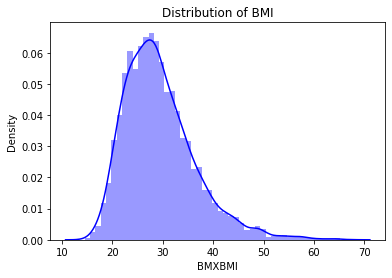

In [16]:
# Visualising Distribution of BMI
sns.distplot(Q1_df['BMXBMI'], color="blue")
plt.title("Distribution of BMI")
plt.show()

Our dependent variable BMI has an asymmetric distribution. It has a right skewness, outliers in the right side, which means that mean > median.

In [17]:
#checking a value of skewnes, which in the best case should be 0
Q1_df['BMXBMI'].skew()

1.1093945130775973

In [18]:
#checking correlation between 2 variables, to see if there is linear relationship between 2 variables
Q1_df[["RIDAGEYR", "BMXBMI"]].corr()

,RIDAGEYR,BMXBMI
RIDAGEYR,1.000000,0.059597
BMXBMI,0.059597,1.000000


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


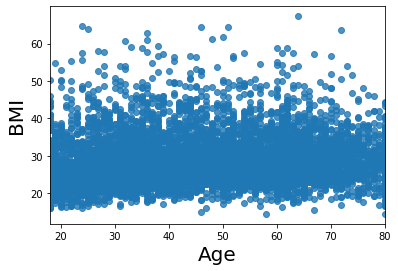

In [19]:
#Regression plot
sns.regplot('RIDAGEYR','BMXBMI', data=Q1_df)
plt.xlabel('Age',fontsize=20)
plt.ylabel('BMI',fontsize=20)
plt.show()

We see that there is no linear relationship between these 2 variables. Correlation matrix also showed that.

Let's build up our Linear Regression Model using Statsmodels

In [20]:
import statsmodels.api as sm

In [21]:
modell = sm.OLS.from_formula("BMXBMI ~ RIDAGEYR", data = Q1_df)
result = modell.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 BMXBMI   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     20.17
Date:                Mon, 09 Nov 2020   Prob (F-statistic):           7.21e-06
Time:                        09:17:59   Log-Likelihood:                -19118.
No. Observations:                5662   AIC:                         3.824e+04
Df Residuals:                    5660   BIC:                         3.825e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     28.2788      0.263    107.496      0.000      27.763      28.795
RIDAGEYR       0.0230      0.005      4.492      0.000       0.013       0.033
==============================================================================
Omnibus:                     1083.068   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2193.456
Skew:                           1.140   Prob(JB):                         0.00
Kurtosis:                       5.025   Cond. No.                         144.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

__Q1a.__ According to your fitted model, do older people tend to have higher or lower BMI than younger people?

According to our model we didn't find causation between these two variables.
This fitted model implies that when comparing two people whose ages differ by one year, the older person will on average have 0.02(age coef) units higher BMI than the younger person. 

__Q1b.__ Based your analysis, are you confident that there is a relationship between BMI and age in the population that NHANES represents?

Our confidence interval is between 0.01 - 0.02 , p-value 0.00 which means that our result is statistically not significant. And this data there is no relationship between these 2 variables.

__Q1c.__ By how much does the average BMI of a 40 year old differ from the average BMI of a 20 year old?

Comparing a 40 year-old person to a 20 year-old person, there is a 20 year difference in age, which translates into a 20 * 0.02 = 0.4 unit difference in average BMI between these two people. This difference is too small compared to one standard deviation, and would generally be considered to be an not significant shift.

BMI is expressed in kg/m**2. In order to better understand the meaning of the estimated regression parameter 0.02, we can look at the standard deviation of BMI:

In [ ]:
Q1_df.BMXBMI.std()

7.095920957539856

__Q1d.__ What fraction of the variation of BMI in this population is explained by age?

The primary summary statistic for assessing the strength of a predictive relationship in a regression model is the R-squared, which is shown to be 0.004 in the regression output above. This means that 0.4% of the variation in BMI is explained by age. 

**Adding a second variable**

## **Question 2:** 

Add gender and ethnicity as additional control variables to your linear model relating BMI to age.  You will need to recode the ethnic groups based
on the values in the codebook entry for [RIDRETH1](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#RIDRETH1).

In [22]:
#creating Dataframe for the second question
Q2_df = df[["RIAGENDR", "RIDRETH1", "RIDAGEYR", "BMXBMI"]]

In [23]:
Q2_df['RIDRETH1'].unique()

array([3, 4, 1, 5, 2])

In [24]:
#checking null values
pd.isnull(Q2_df).sum()

RIAGENDR     0
RIDRETH1     0
RIDAGEYR     0
BMXBMI      73
dtype: int64

In [25]:
#drop null values
Q2_df = Q2_df.dropna()

In [27]:
#reset index
Q2_df.reset_index(inplace = True, drop = True)

In [29]:
#recheck null
pd.isnull(Q2_df).sum()

RIAGENDR    0
RIDRETH1    0
RIDAGEYR    0
BMXBMI      0
dtype: int64

In [30]:
Q2_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5662 entries, 0 to 5661
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   RIAGENDR  5662 non-null   int64  
 1   RIDRETH1  5662 non-null   int64  
 2   RIDAGEYR  5662 non-null   int64  
 3   BMXBMI    5662 non-null   float64
dtypes: float64(1), int64(3)
memory usage: 177.1 KB


In [33]:
#relabeling "Etnicity" variable
Q2_df["Etnicity"] = Q2_df.RIDRETH1.replace({1: "Mexican American", 2: "Other Hispanic", 3: "Non-Hispanic White",
                                          4: "Non-Hispanic Black", 5: "Other Race - Including Multi-Racial"})

In [31]:
#relabeling "Gender" variable
Q2_df["Gender"] = Q2_df.RIAGENDR.replace({1: "Male", 2: "Female"})

In [34]:
Q2_df.head()

,RIAGENDR,RIDRETH1,RIDAGEYR,BMXBMI,Gender,Etnicity
0,1,3,62,27.8,Male,Non-Hispanic White
1,1,3,53,30.8,Male,Non-Hispanic White
2,1,3,78,28.8,Male,Non-Hispanic White
3,2,3,56,42.4,Female,Non-Hispanic White
4,2,4,42,20.3,Female,Non-Hispanic Black


In [36]:
#looking for correlation between 3 variables
Q2_df[["RIDAGEYR", "RIAGENDR", "BMXBMI"]].corr()

,RIDAGEYR,RIAGENDR,BMXBMI
RIDAGEYR,1.000000,-0.011766,0.059597
RIAGENDR,-0.011766,1.000000,0.081811
BMXBMI,0.059597,0.081811,1.000000


As we see, there is no significant correlation.

In [37]:
#building model with 3 variables
model2 = sm.OLS.from_formula("BMXBMI ~ RIDAGEYR + Gender + Etnicity", data=Q2_df)
result2 = model2.fit()
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 BMXBMI   R-squared:                       0.055
Model:                            OLS   Adj. R-squared:                  0.054
Method:                 Least Squares   F-statistic:                     55.09
Date:                Mon, 09 Nov 2020   Prob (F-statistic):           2.18e-66
Time:                        09:42:45   Log-Likelihood:                -18968.
No. Observations:                5662   AIC:                         3.795e+04
Df Residuals:                    5655   BIC:                         3.800e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===================================================================================================================
                                                      coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------
Intercept                                          30.5174      0.330     92.513      0.000      29.871      31.164
Gender[T.Male]                                     -1.0696      0.184     -5.819      0.000      -1.430      -0.709
Etnicity[T.Non-Hispanic Black]                     -0.5707      0.295     -1.934      0.053      -1.149       0.008
Etnicity[T.Non-Hispanic White]                     -1.8350      0.273     -6.715      0.000      -2.371      -1.299
Etnicity[T.Other Hispanic]                         -1.1240      0.334     -3.364      0.001      -1.779      -0.469
Etnicity[T.Other Race - Including Multi-Racial]    -4.7212      0.318    -14.849      0.000      -5.345      -4.098
RIDAGEYR                                            0.0205      0.005      4.054      0.000       0.011       0.030
==============================================================================
Omnibus:                     1055.828   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2167.403
Skew:                           1.106   Prob(JB):                         0.00
Kurtosis:                       5.071   Cond. No.                         299.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

__Q2a.__ How did the mean relationship between BMI and age change when you added additional covariates to the model?

The model that was fit above uses age, gender and ethnicity to explain the variation in BMI. It finds that two people with the same gender whose ages differ by one year tend to have BMI values differing by 0.02 units, which is essentially the same age parameter that we found above in the model based on age alone. This model also shows us that comparing a man and a woman of the same age, the man will on average have 1.06 units less BMI.

__Q2b.__ How did the standard error for the regression parameter for age change when you added additional covariates to the model?

Standard error is the same for both cases (0.05)

__Q2c.__ How much additional variation in BMI is explained by age, gender, and ethnicity that is not explained by age alone?

R-squared now is 0.05 , which means 5% variation in BMI is explained by age, gender, and ethnicity. Previously it was 0.4%.

__Q2e.__ What is the expected difference between the BMI of a 40 year-old non-Hispanic black man and a 30 year-old non-Hispanic black man?

-1.0696 + 10 * (-0.5707) = -6.7766

## **Question 3:**

Randomly sample 25% of the NHANES data, then fit the same model you used in question 2 to this data set.

In [38]:
Q3_df = Q2_df.sample(frac =.25)

In [39]:
Q3_df.shape

(1416, 6)

In [41]:
Q3_df.head()

,RIAGENDR,RIDRETH1,RIDAGEYR,BMXBMI,Gender,Etnicity
3694,2,4,48,32.3,Female,Non-Hispanic Black
4109,2,3,45,26.2,Female,Non-Hispanic White
916,2,2,42,32.9,Female,Other Hispanic
445,2,3,78,23.1,Female,Non-Hispanic White
1217,2,3,66,42.8,Female,Non-Hispanic White


In [43]:
#reset index
Q3_df.reset_index(inplace = True, drop = True)

In [45]:
#building model with 3 variables
model3 = sm.OLS.from_formula("BMXBMI ~ RIDAGEYR + Gender + Etnicity", data=Q3_df)
result3 = model3.fit()
result3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 BMXBMI   R-squared:                       0.043
Model:                            OLS   Adj. R-squared:                  0.039
Method:                 Least Squares   F-statistic:                     10.68
Date:                Mon, 09 Nov 2020   Prob (F-statistic):           1.26e-11
Time:                        10:00:02   Log-Likelihood:                -4716.6
No. Observations:                1416   AIC:                             9447.
Df Residuals:                    1409   BIC:                             9484.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===================================================================================================================
                                                      coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------
Intercept                                          29.2028      0.638     45.767      0.000      27.951      30.454
Gender[T.Male]                                     -0.1621      0.362     -0.448      0.654      -0.872       0.548
Etnicity[T.Non-Hispanic Black]                      0.6015      0.576      1.045      0.296      -0.528       1.731
Etnicity[T.Non-Hispanic White]                     -1.2738      0.534     -2.387      0.017      -2.320      -0.227
Etnicity[T.Other Hispanic]                         -0.4837      0.676     -0.715      0.474      -1.810       0.843
Etnicity[T.Other Race - Including Multi-Racial]    -3.5636      0.614     -5.799      0.000      -4.769      -2.358
RIDAGEYR                                            0.0221      0.010      2.218      0.027       0.003       0.042
==============================================================================
Omnibus:                      236.147   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              423.165
Skew:                           1.035   Prob(JB):                     1.29e-92
Kurtosis:                       4.698   Cond. No.                         296.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

__Q3a.__ How do the estimated regression coefficients and their standard errors compare between these two models?  Do you see any systematic relationship between the two sets of results?

In the first model we have an intercept 30.5174 and standard error 0.330. In the second model 29.2028 and 0.638. As we see they are very close numbers, the difference is very small.

## Question 4:

Generate a scatterplot of the residuals against the fitted values for the model you fit in question 2.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


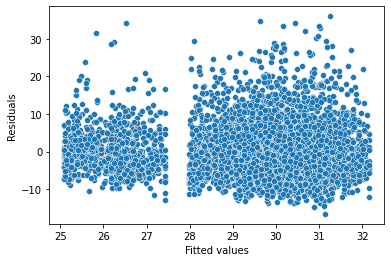

In [46]:
pp = sns.scatterplot(result2.fittedvalues, result2.resid)
pp.set_xlabel("Fitted values")
_ = pp.set_ylabel("Residuals")

__Q4a.__ What mean/variance relationship do you see?

Data is spread between -10 and 10 interval. We have a modestly increasing mean/variance relationship. That he scatter around the mean BMI is greater when the mean BMI itself is greater.

## **Question 5:**

Generate a plot showing the fitted mean BMI as a function of age for Mexican American men.  Include a 95% simultaneous confidence band on your graph.

In [47]:
Q2_df.head()

,RIAGENDR,RIDRETH1,RIDAGEYR,BMXBMI,Gender,Etnicity
0,1,3,62,27.8,Male,Non-Hispanic White
1,1,3,53,30.8,Male,Non-Hispanic White
2,1,3,78,28.8,Male,Non-Hispanic White
3,2,3,56,42.4,Female,Non-Hispanic White
4,2,4,42,20.3,Female,Non-Hispanic Black


In [48]:
Q2_df['Etnicity'].unique()

array(['Non-Hispanic White', 'Non-Hispanic Black', 'Mexican American',
       'Other Race - Including Multi-Racial', 'Other Hispanic'],
      dtype=object)

In [50]:
from statsmodels.sandbox.predict_functional import predict_functional

/usr/local/lib/python3.6/dist-packages/statsmodels/sandbox/predict_functional.py:171: ValueWarning: 'RIAGENDR', 'RIDRETH1' in data frame but not in summaries or values.
  ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/sandbox/predict_functional.py:429: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  bz /= sigma[:, None]
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'BMI')

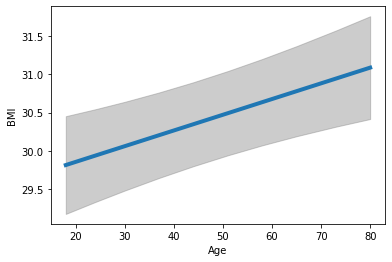

In [51]:
values = {"Gender": "Male", "Etnicity": "Mexican American"}

pr, cb, fv = predict_functional(result2, "RIDAGEYR",
                values=values, ci_method="simultaneous")

ax = sns.lineplot(fv, pr, lw=4)
ax.fill_between(fv, cb[:, 0], cb[:, 1], color='grey', alpha=0.4)
ax.set_xlabel("Age")
ax.set_ylabel("BMI")

__Q5a.__ According to your graph, what is the longest interval starting at year 30 following which the mean BMI could be constant?  *Hint:* What is the longest horizontal line starting at age 30 that remains within the confidence band?


29.5 - 30.5

__Q5b.__ Add an additional line and confidence band to the same plot, showing the relationship between age and BMI for Mexican American women.  At what ages do these intervals not overlap?

## **Question 6:**

Use an added variable plot to assess the linearity of the relationship between BMI and age (when controlling for gender and ethnicity).

In [54]:
Q2_df.head()

,RIAGENDR,RIDRETH1,RIDAGEYR,BMXBMI,Gender,Etnicity
0,1,3,62,27.8,Male,Non-Hispanic White
1,1,3,53,30.8,Male,Non-Hispanic White
2,1,3,78,28.8,Male,Non-Hispanic White
3,2,3,56,42.4,Female,Non-Hispanic White
4,2,4,42,20.3,Female,Non-Hispanic Black


In [53]:
# This is not part of the main Statsmodels API, so needs to be imported separately
from statsmodels.graphics.regressionplots import add_lowess

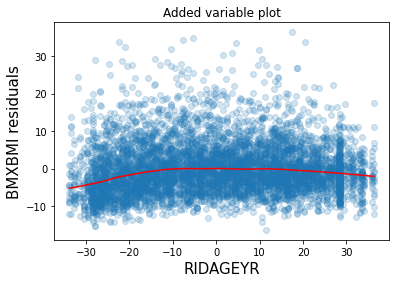

In [55]:
# This is an equivalent way to fit a linear regression model, it needs to be
# done this way to be able to make the added variable plot
model4 = sm.GLM.from_formula("BMXBMI ~ RIDAGEYR + Etnicity + Gender", data=Q2_df)
result4 = model4.fit()
result4.summary()

fig = result4.plot_added_variable("RIDAGEYR")
ax = fig.get_axes()[0]
ax.lines[0].set_alpha(0.2)
_ = add_lowess(ax)

__Q6a.__ What is your interpretation of the added variable plot?

This is a plot that may reveal nonlinearity in the relationship between one covariate and the outcome. Below, we create an added variable plot for age as a predictor of BMI. The red line is an estimate of the relationship between age and BMI. Unlike the relationship in the model, it is not linear, but almost flat. This would imply that BMI increases faster in young ages, in the middle age it is flat and as age increases BMI slightly decreases.